In [86]:
# To Hndle The Data
import pandas as pd
import numpy as np

# To Visualize the data
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
from IPython.display import display
%matplotlib inline

# To Hnadle Warnings during the execution of the code
import warnings
warnings.filterwarnings("ignore")


# Importing the dataset for analysis


In [ ]:
data =pd.read_csv("../data/raw/train.csv")
data.head(5)

# Exploratory Data Analysis

In [ ]:
# check the shape of the dataset i.e number of rows and columns
data.shape

In [ ]:
# exploratory data analysis, giving an overview of the dataset i.e the number of rows, columns, data types and non-null values
data.info()

In [ ]:
# listing the columns in the dataset
data.columns

In [ ]:
data.drop(columns=["Id"], inplace=True)

In [ ]:


# calculate the percentage of missing value per column in the dataset
missing_percentage = data.isnull().mean() * 100

# Optional: Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Print the result
print(missing_percentage.sort_values(ascending=False))


In [ ]:
# visualizing the percentage of missing values per column
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="viridis")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Value Percentage per Column")
plt.tight_layout()
plt.show()

## observation from the above information
* - The dataset contains 81 columns and 1460 rows
* - There are 35 integers, 3 floats and 43 objects in the dataset
* - Columns ike MiscFeature,Fence,PoolQC,FireplaceQU, Alley, MasVnrType, LotFrontage, have high NAN percentage
* - Important numerical features like LotFrontage, GarageYrBlt, and MasVnrArea also contain some missing values.
* - Id is just a unique identifier and not useful for analysis.
* - Some columns have incorrect data types.
* - OverallQual, OverallCond are ordinal variables, but currently treated as integers.
* - MSSubClass represents building category, so it should be categorical, not integer

<h2>Analysing and cleaning  each columns of the dataset</h2>

In [ ]:
data.describe().T

In [ ]:
skewness = data.select_dtypes(include="number").skew().sort_values(ascending=False)

In [ ]:
# visualizing the skewness of numerical features

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.values, y=skewness.index, palette='coolwarm')
plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness")
plt.ylabel("Features")
plt.axvline(x=0, color='black', linestyle='--')  # vertical line at 0 for reference
plt.tight_layout()
plt.show()

### Categorical Analysis

In [43]:
# Separate columns
# Categorical columns: object and category types
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns: int and float types
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Subset data
data_categorical = data[categorical_cols]
data_numerical = data[numerical_cols]


In [44]:
missing_categorical = data_categorical.isnull().sum()


print("Missing value in categorical columns: \n", missing_categorical[missing_categorical > 0])

Missing value in categorical columns: 
 Series([], dtype: int64)


In [45]:
# percentage of missing values in categorical columns
# Calculate total number of rows
total_rows = len(data_categorical)

# Compute percentage
missing_categorical_percent = (missing_categorical / total_rows) * 100

# Display result
print("Missing percentage in categorical columns:\n")
print(missing_categorical_percent.sort_values(ascending=False).round(2))

Missing percentage in categorical columns:

MSZoning         0.0
Electrical       0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
KitchenQual      0.0
Street           0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
BsmtQual         0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
SaleCondition    0.0
dtype: float64


In [ ]:
# Get a colormap and normalize values
cmap = get_cmap("plasma")  # You can change this to 'viridis', 'magma', etc.
norm = plt.Normalize(missing_categorical_percent.min(), missing_categorical_percent.max())
colors = [cmap(norm(val)) for val in missing_categorical_percent.values]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_categorical_percent.values,
    y=missing_categorical_percent.index,
    palette=colors  # Apply gradient colors
)

plt.xlabel("Percentage of Missing Values")
plt.ylabel("Categorical Columns")
plt.title("Missing Value Percentage in Categorical Columns")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols_to_drop = [
    "MiscFeature", "Fence", "PoolQC", "FireplaceQu", "Alley"
]

data.drop(columns=categorical_cols_to_drop, inplace=True)

In [ ]:
data.columns

In [ ]:
def update_categorical_data(data):
    return data.select_dtypes(include=["object", "category"]).copy()

In [ ]:
data_categorical.columns

In [ ]:
data_categorical["MasVnrType"].isnull().sum()

In [ ]:
data_categorical["MasVnrType"].unique()

In [ ]:
# Note: the MasVnrType column have a high number of missing value and the amount of unique categories is low, we replace the missing values with None
# Note: replace the msising values with 'None', simply means the house has no mansory veneer
data["MasVnrType"] = data["MasVnrType"].fillna("None")

In [ ]:
data_categorical["Electrical"].isnull().sum(
)

In [ ]:
data_categorical["Electrical"].unique()

In [ ]:
data["Electrical"].fillna(data["Electrical"].mode()[0], inplace=True)

In [ ]:
garage_cols = [
    "GarageType", "GarageFinish", "GarageQual", "GarageCond"
]

for col in garage_cols:
    data[col].fillna("None", inplace = True)

In [ ]:
Bsmt_cols = [
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"
]

for col2 in Bsmt_cols:
    data[col2].fillna("None", inplace= True)

In [ ]:
# the function i created erlier contain only objects
# all the updated upject that are in the main data are copied to the data category
data_categorical = update_categorical_data(data)

In [ ]:
data_categorical.columns

In [ ]:
data_categorical.isnull().sum()

In [ ]:
# this shows that the missing values in the categorical columns have been handled
# and there are no more missing values in the categorical columns
# and this also shows that the data_categorical dataframe is updated into the main data
data.select_dtypes(include=["object", "category"]).isnull().sum()

In [ ]:
# visualization of the null value of the categorical columns using heatmap 

In [ ]:
# Visualize missing values in categorical columns using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(data_categorical.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values in Categorical Columns (Heatmap)")
plt.xlabel("Categorical Columns")
plt.show()

### numerical column

In [ ]:
data_numerical.isnull().sum()

In [ ]:
data_numerical.info()

In [46]:
# List columns with at least one null value
columns_with_null = data_numerical.columns[data_numerical.isnull().any()].tolist()

# Print the result
print("Columns with missing values:")
print(columns_with_null)



Columns with missing values:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
# To handle msissing value in numerical columns, we will use the mean and median
# We will plot the boxplot of each numerical column with missing values
# Get columns with missing values
columns_with_null = data_numerical.columns[data_numerical.isnull().any()]

# Set up unique colors (generate a color palette)
colors = sns.color_palette("husl", len(columns_with_null))

# Plot each boxplot and print mean/median in a loop
for col, color in zip(columns_with_null, colors):
    print(f"\nColumn: {col}")
    print(f"Mean   : {data_numerical[col].mean():.2f}")
    print(f"Median : {data_numerical[col].median():.2f}")
    
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=data_numerical[col], color=color)
    plt.title(f"Boxplot of {col} (with missing values)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show() 

### The mean and median of MasVnrArea are quite different

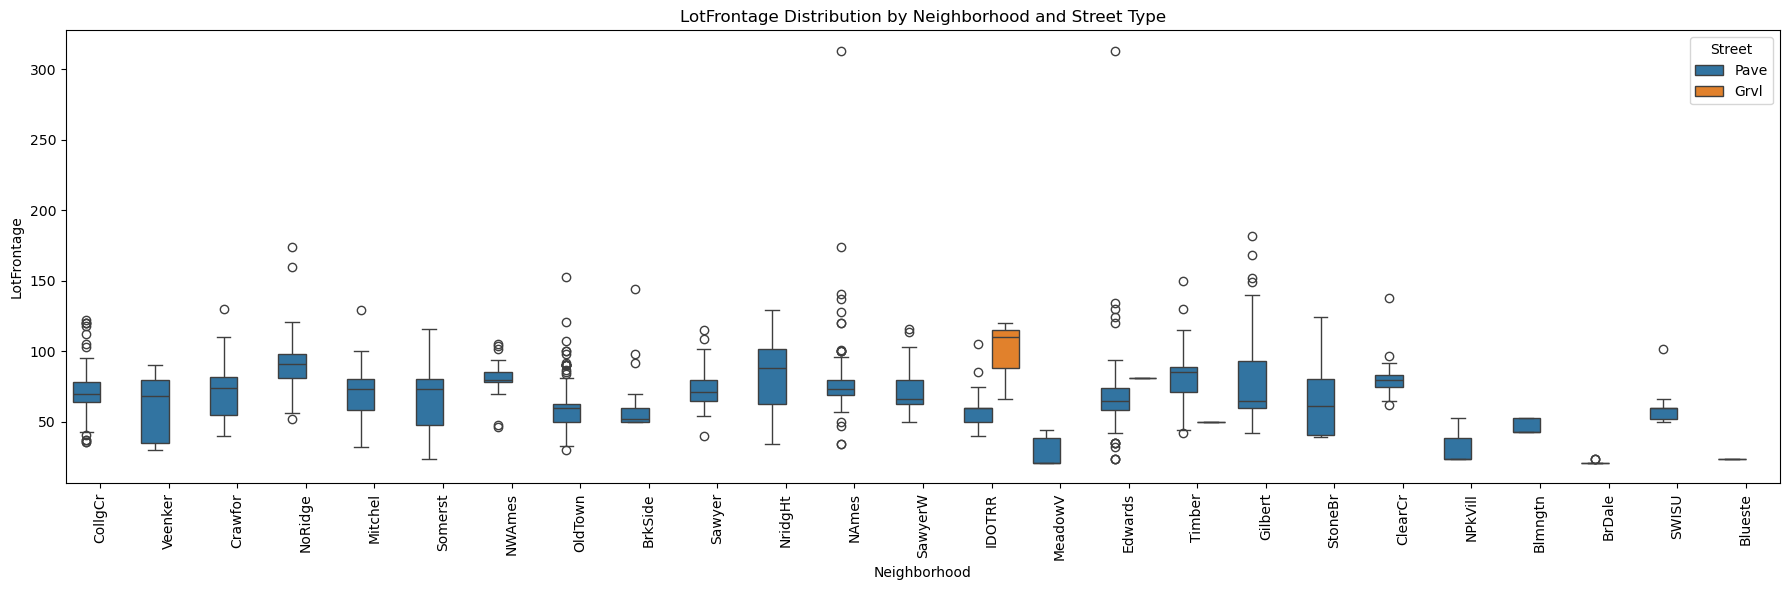

In [ ]:
# we want to see how lotfrontage varies across neighborhood and street type using boxplot
# we will use a boxplot to visualize the distribution of lotfrontage by neighborhood and street type
# note: LotFrontage: Linear feet of street connected to property
# Note; Neighborhood: Physical locations within Ames city limits
plt.figure(figsize=(18, 6))
sns.boxplot(data=data, x='Neighborhood', y='LotFrontage', hue='Street')
plt.xticks(rotation=90)
plt.title('LotFrontage Distribution by Neighborhood and Street Type')
plt.tight_layout()
plt.show()

In [48]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

### dealing with the missing values in lotfrontage, GarageYrBlt, MasVnrArea


In [51]:
data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [52]:
data['LotFrontage'] = data.groupby(['Neighborhood', 'Street'])['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [53]:
def update_numerical_data(data):
    return data.select_dtypes(include=("number", 'float', "int64")).copy()

In [54]:
data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [55]:
data['GarageYrBlt'].isna().sum()

81

In [56]:
# Note: we can't use the median to fill the missing values in garage year built
# we will replace the nan with No-garage.
data['GarageYrBlt'] = data["GarageYrBlt"].fillna("No Garage")

In [57]:
data['GarageYrBlt'].isna().sum()

0

In [59]:
data["MasVnrArea"].isna().sum()

8

In [62]:
#Note: we will explore the MasVnrArea column to see how to handle the missing values
data["MasVnrArea"].dtype

dtype('float64')

In [68]:
data[data["MasVnrType"] == "None"].shape[0]

872

In [72]:
data[data['MasVnrArea'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


In [73]:
# Check how many rows have MasVnrType as 'None' but MasVnrArea is NOT 0
invalid_rows = data[(data['MasVnrType'] == 'None') & (data['MasVnrArea'] != 0)]

# Display these inconsistent rows
print(f"Inconsistent rows where MasVnrType is 'None' but MasVnrArea is not 0 are :  {len(invalid_rows)}")
display(invalid_rows[['MasVnrType', 'MasVnrArea']])

Inconsistent rows where MasVnrType is 'None' but MasVnrArea is not 0 are :  13


,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
624,None,288.0
650,None,NaN
773,None,1.0
936,None,NaN
973,None,NaN
977,None,NaN
1230,None,1.0
1243,None,NaN


In [74]:
data['MasVnrType'].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [84]:
def display_inconsistent_masonry_rows(data, type_col='MasVnrType', area_col='MasVnrArea', none_value='None', max_rows=10):
    """
    Identify and display rows where the masonry type is 'None' but the area is not 0.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - type_col (str): Column name for masonry type (default: 'MasVnrType').
    - area_col (str): Column name for masonry area (default: 'MasVnrArea').
    - none_value (str): Value indicating no masonry (default: 'None').
    - max_rows (int): Maximum number of rows to display (default: 10).
    
    Returns:
    - pd.DataFrame: Filtered DataFrame with inconsistent rows.
    """
    # Validate inputs
    if not isinstance(data, pd.DataFrame):
        raise TypeError("Input 'data' must be a Pandas DataFrame")
    if type_col not in data.columns or area_col not in data.columns:
        raise ValueError(f"One or both columns ({type_col}, {area_col}) not found in DataFrame")
    
    # Filter inconsistent rows
    inconsistent_rows = data[(data[type_col] == none_value) & (data[area_col] != 0) & (data[area_col].notna())]
    
    # Display results
    print(f"Inconsistent rows where {type_col} is '{none_value}' but {area_col} is not 0: {len(inconsistent_rows)}")
    if not inconsistent_rows.empty:
        display(inconsistent_rows[[type_col, area_col]].head(max_rows))
    else:
        print(f"No inconsistent rows found for {type_col} = '{none_value}' and non-zero {area_col}.")
    
    return inconsistent_rows

# Example usage
try:
    inconsistent_rows = display_inconsistent_masonry_rows(data)

except (TypeError, ValueError) as e:
    print(f"Error: {e}")

Inconsistent rows where MasVnrType is 'None' but MasVnrArea is not 0: 5


,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


In [92]:
def display_inconsistent_masonry_rows(data, type_col='MasVnrType', area_col='MasVnrArea', none_value='None', max_rows=10, plot=False):
    """
    Identify and display rows where the masonry type is 'None' but the area is not 0.
    Optionally plot a boxplot of the area column for inconsistent rows.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - type_col (str): Column name for masonry type (default: 'MasVnrType').
    - area_col (str): Column name for masonry area (default: 'MasVnrArea').
    - none_value (str): Value indicating no masonry (default: 'None').
    - max_rows (int): Maximum number of rows to display (default: 10).
    - plot (bool): Whether to show a boxplot of the area column (default: False).
    
    Returns:
    - pd.DataFrame: Filtered DataFrame with inconsistent rows.
    """
    # Validate inputs
    if not isinstance(data, pd.DataFrame):
        raise TypeError("Input 'data' must be a Pandas DataFrame")
    if type_col not in data.columns or area_col not in data.columns:
        raise ValueError(f"One or both columns ({type_col}, {area_col}) not found in DataFrame")
    
    # Filter inconsistent rows
    inconsistent_rows = data[(data[type_col] == none_value) & (data[area_col] != 0) & (data[area_col].notna())]
    
    # Display results
    print(f"Inconsistent rows where {type_col} is '{none_value}' but {area_col} is not 0: {len(inconsistent_rows)}")
    if not inconsistent_rows.empty:
        display(inconsistent_rows[[type_col, area_col]].head(max_rows))
        if plot:
            plt.figure(figsize=(8, 4))
            sns.boxplot(y=inconsistent_rows[area_col])
            plt.title(f'Distribution of {area_col} in Inconsistent Rows')
            plt.ylabel(area_col)
            plt.tight_layout()
            plt.show()
    else:
        print(f"No inconsistent rows found for {type_col} = '{none_value}' and non-zero {area_col}.")
    
    return inconsistent_rows

Inconsistent rows where MasVnrType is 'None' but MasVnrArea is not 0: 5


,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

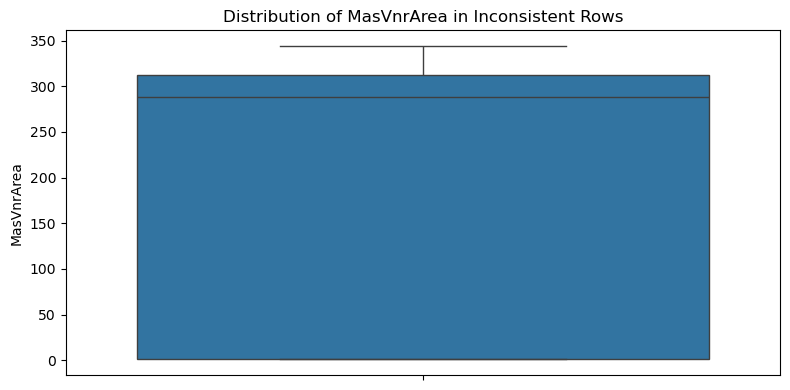

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,147,0,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,COD,Normal,114500
1230,90,RL,71.0,18890,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,145,0,0,0,8300,8,2007,WD,Normal,190000
1300,60,RL,65.0,10762,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,125000


In [94]:
display_inconsistent_masonry_rows(data, plot=True)

In [95]:
data.loc[(data['MasVnrType'] == 'None') & (data['MasVnrArea'] != 0), 'MasVnrArea'] = 0

In [96]:
data_numerical = update_numerical_data(data)

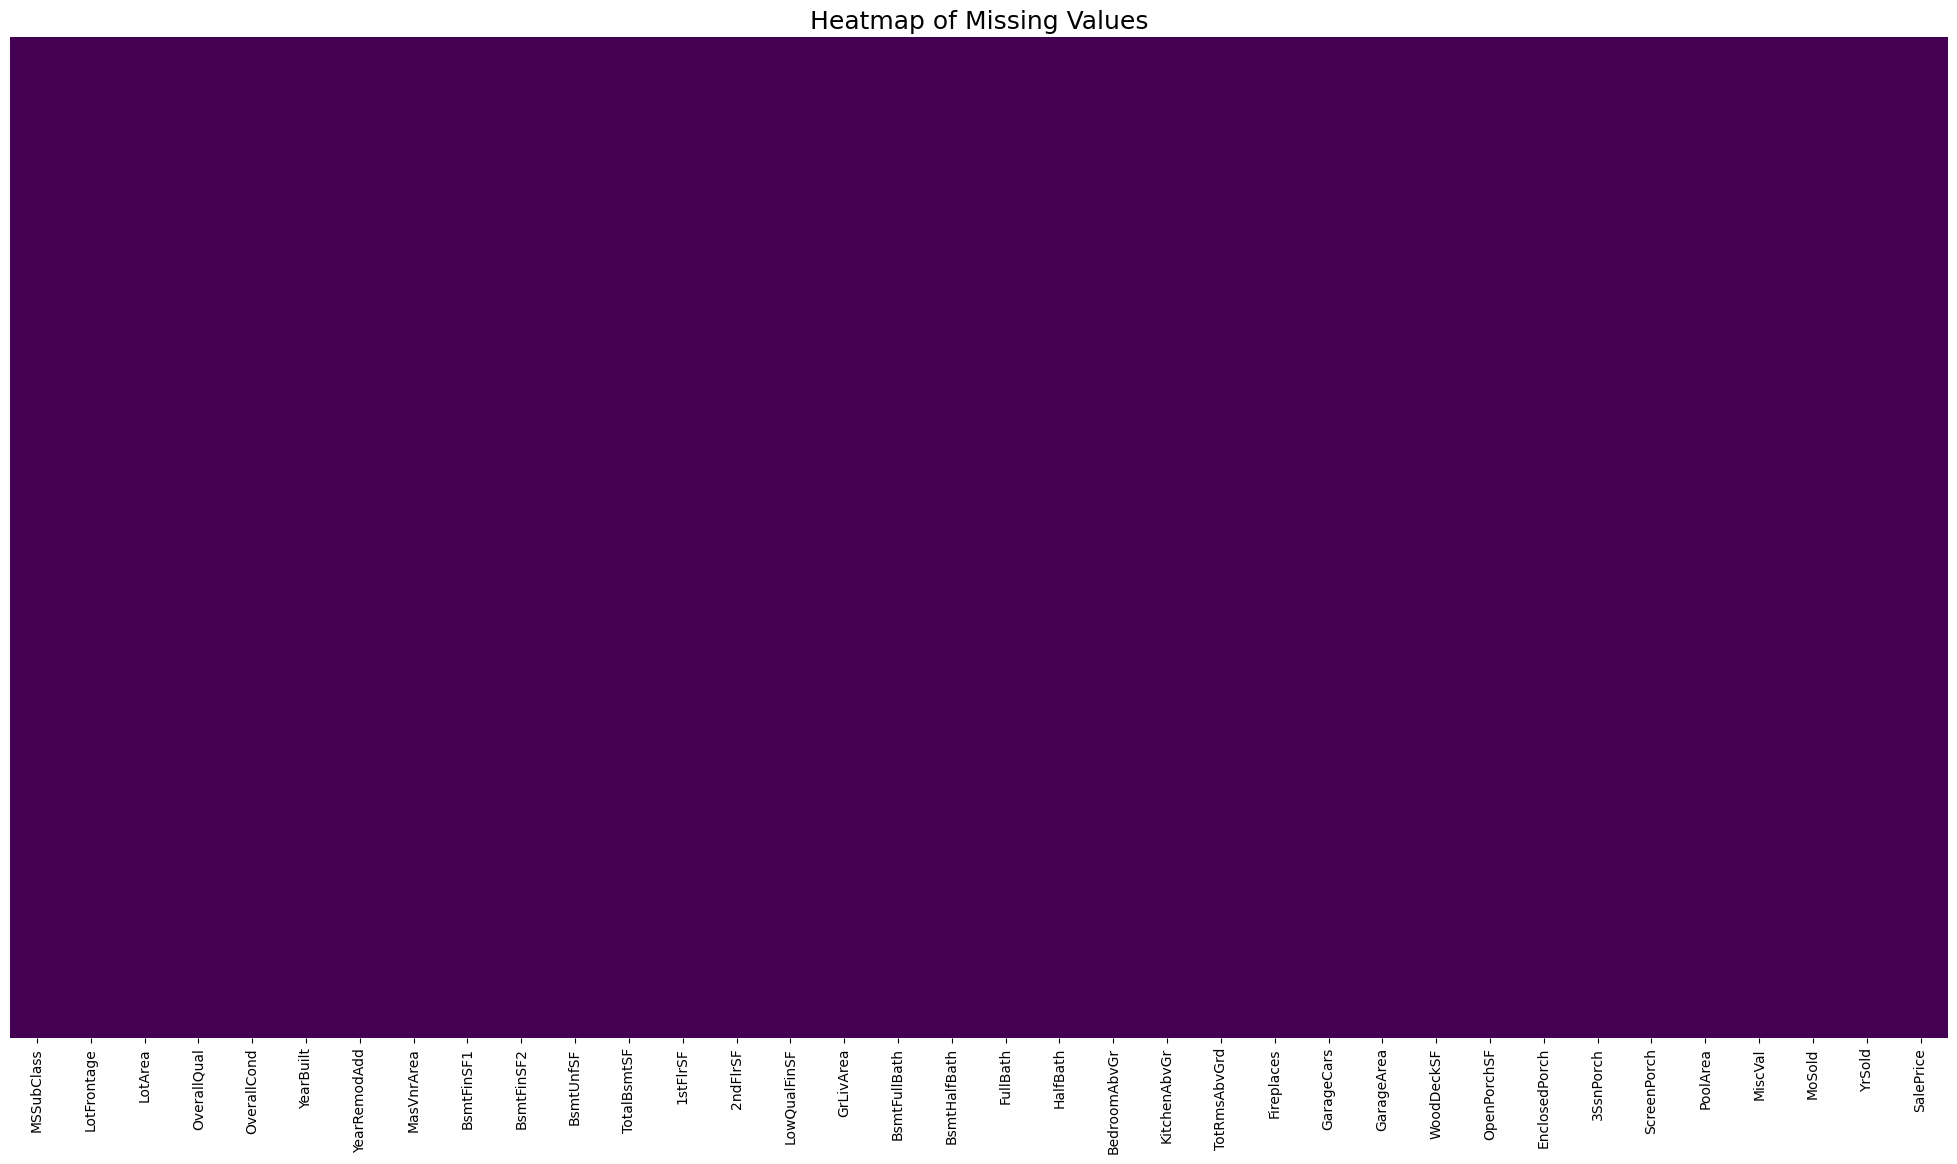

In [97]:
# Set a large figure size for better visibility
plt.figure(figsize=(25, 13))

# Plot heatmap showing missing values in the dataset
sns.heatmap(data_numerical.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.title("Heatmap of Missing Values", fontsize=18)

plt.show()

In [100]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

Most features like house area and garage size have small values for most homes, but a few are very big.

Features like number of bathrooms, garages, and fireplaces have specific counts, mostly 1, 2, or 3.

Year-related features show that more houses were built or remodeled in recent years.

Some features like LotArea, PoolArea, and MiscVal have a few very high values.

The house price (SalePrice) is also higher for a few homes, but most are mid-range.

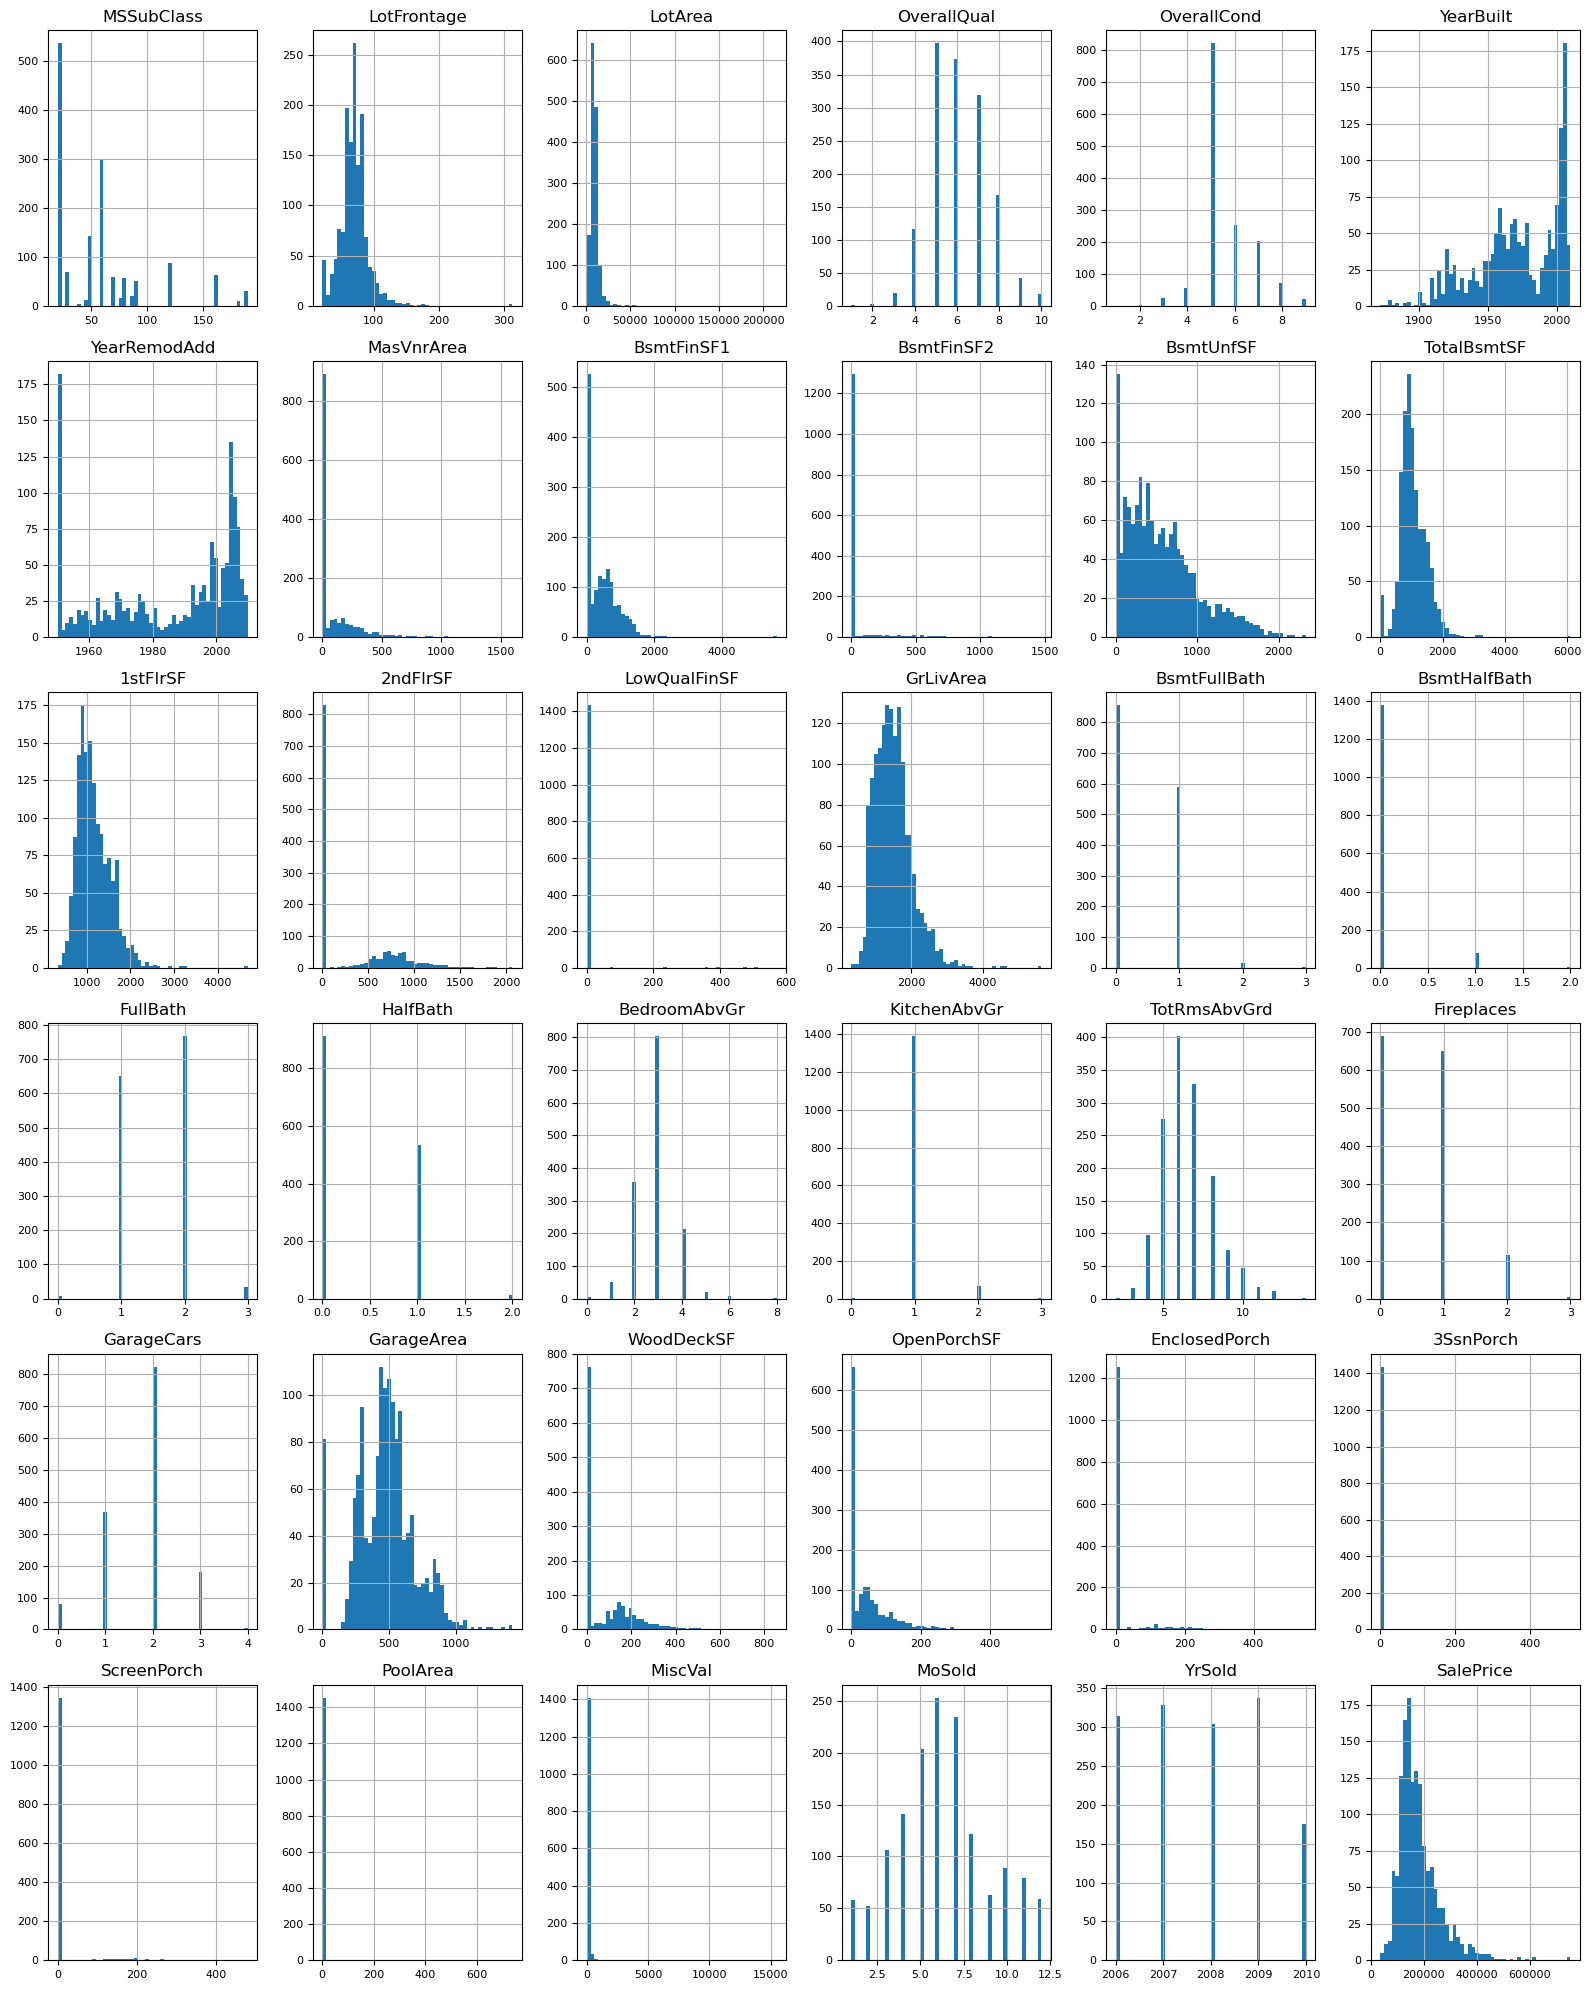

In [101]:
# Plot histograms for all numerical columns in df_num
data_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Tight layout and suppress verbose output
plt.tight_layout()
plt.show()